<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">Deciding on Compensation Benefits</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Machine Learning Project - Feature Selection</h3></center>
</div>

* [1. Environment Setup](#1-environment-setup)
  * [1.1 Import Libraries](#11-import-libraries)
  * [1.2 Import Dataset](#12-import-dataset)
  * [1.3 Assumptions](#13-assumptions)
* [2. Claim Injury Type Feature Selection](#2-claim-injury-type-feature-selection)
  * [2.1 Split the data set](#21-split-the-data-set)
  * [2.2 Feature Selection](#22-feature-selection)
    * [2.2.1 Univariate Analysis](#221-univariate-analysis)
    * [2.2.2 ANOVA](#222-anova)
    * [2.2.3 Chi Squared](#223-chi-squared)
    * [2.2.4 Spearman Correlation](#224-spearman-correlation)
    * [2.2.5 Random Forest](#225-random-forest)
    * [2.2.6 LASSO](#226-lasso)
    * [2.2.7 Elastic Net](#227-elastic-net)
    * [2.2.8 Results](#228-results)
* [3. Claim Injury Type Feature Selection](#3-agreement-reached-feature-selection)
  * [3.1 Split the data set](#31-split-the-data-set)
  * [3.2 Feature Selection](#32-feature-selecion)
    * [3.2.1 Univariate Analysis](#321-univariate-analysis)
    * [3.2.2 ANOVA](#322-anova)
    * [3.2.3 Chi Squared](#323-chi-squared)
    * [3.2.4 Spearman Correlation](#324-spearman-correlation)
    * [3.2.5 Random Forest](#325-random-forest)
    * [3.2.6 LASSO](#326-lasso)
    * [3.2.7 Elastic Net](#327-elastic-net)
    * [3.2.8 Results](#328-results)

<div class="alert alert-block alert-success">

# **1.** Environment Setup

<div>

## **1.1** Import Libraries

In [ ]:
from functions import *

warnings.filterwarnings("ignore")

## **1.2** Import Dataset

In [83]:
X = pd.read_csv('X.csv')
y_multi = pd.read_csv('y.csv') 

y_bin = X.set_index("Claim Identifier")[["Agreement Reached"]]
X.set_index('Claim Identifier', inplace=True)

X = X.drop(columns="Agreement Reached")

y_multi.set_index(X.index, inplace=True)
enc2 = LabelEncoder()
y_encoded = pd.DataFrame(enc2.fit_transform(y_multi), index=y_multi.index, columns=['Claim Injury Type'])

## **1.3** Assumptions

In [84]:
scaler = PowerTransformer()

<div class="alert alert-block alert-success">

# **2.** Claim Injury Type Feature Selection

<div>

## **2.1** Split the data set

In [85]:
X_train_multi, X_val_multi, y_train_multi, y_val_multi = train_test_split(X, y_encoded, test_size = 0.3, 
                                                  random_state = 0, # Ensures reproducibility by controlling the random shuffling of data.

                                                  stratify = y_encoded, # Ensures that the class distribution is preserved in both the training and validation sets, maintaining the proportion of each class.

                                                  shuffle = True)   # Shuffles the data before splitting to ensure a random distribution between the training and validation sets.
X_train_multi, X_val_multi, y_train_multi = preprocessing(X_train_multi, X_val_multi, y_train_multi, scaler)

In [86]:
binary_features = [col for col in X_train_multi.columns if X_train_multi[col].nunique() == 2]

numerical_features = [col for col in X_train_multi.columns 
                      if col not in binary_features and (col.startswith('ce_') or (col in X_train_multi.select_dtypes(include=['int32', 'int64', 'float64']).columns and not col.endswith('Code')))]

date_features = [col for col in X_train_multi.columns if col.endswith('Date')]

categorical_features = [col for col in X_train_multi.columns if col not in numerical_features + binary_features + date_features]

In [87]:
binary_features

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Gender',
 'C-2 Date Missing',
 'C-3 Date Missing',
 'First Hearing Date Missing',
 'Carrier Type Missing',
 'Average Weekly Wage Missing',
 'IME-4 Count Missing',
 'Industry Code Description Missing',
 'WCIO Part Of Body Description Missing',
 'Average Weekly Wage Zero',
 'First Report Submitter']

In [88]:
numerical_features

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Days until First Report',
 'Days until Assembly',
 'Assembly Quarter',
 'Assembly Date Referenced',
 'Accident Date Referenced',
 'First Report Referenced',
 'Log Average Weekly Wage',
 'ce_Carrier Name',
 'ce_Carrier Type',
 'ce_County of Injury',
 'ce_District Name',
 'ce_Industry Code Description',
 'ce_Medical Fee Region',
 'ce_WCIO Cause of Injury Description',
 'ce_WCIO Nature of Injury Description',
 'ce_WCIO Part Of Body Description',
 'ce_Zip Code']

## **2.2** Feature Selecion

Columns to drop heading into feature selection:

- All dates, as we don't believe they are relevant standalone. We only used them to create date diferences  
- All Codes: we're keeping the Descriptions


In [89]:
columns_to_drop = date_features + [col for col in X_train_multi.columns if col.endswith('Code') and col != 'Zip Code'  and col != 'ce_Zip Code']
X_train_multi.drop(columns=columns_to_drop, inplace=True)
numerical_features = [col for col in numerical_features if col not in columns_to_drop]

In [90]:
X_train_multi_num = X_train_multi[numerical_features]
X_train_multi_bin = X_train_multi[binary_features]
X_train_multi_num_bin = pd.concat([X_train_multi[numerical_features], X_train_multi[binary_features]], axis=1)

In [91]:
binary_features

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Gender',
 'C-2 Date Missing',
 'C-3 Date Missing',
 'First Hearing Date Missing',
 'Carrier Type Missing',
 'Average Weekly Wage Missing',
 'IME-4 Count Missing',
 'Industry Code Description Missing',
 'WCIO Part Of Body Description Missing',
 'Average Weekly Wage Zero',
 'First Report Submitter']

In [92]:
numerical_features

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Days until First Report',
 'Days until Assembly',
 'Assembly Quarter',
 'Assembly Date Referenced',
 'Accident Date Referenced',
 'First Report Referenced',
 'Log Average Weekly Wage',
 'ce_Carrier Name',
 'ce_Carrier Type',
 'ce_County of Injury',
 'ce_District Name',
 'ce_Industry Code Description',
 'ce_Medical Fee Region',
 'ce_WCIO Cause of Injury Description',
 'ce_WCIO Nature of Injury Description',
 'ce_WCIO Part Of Body Description',
 'ce_Zip Code']

In [115]:
feature_scores_multi = {}

### 2.2.1 Univariate Analysis

Checking if some variable is univariate (variance equal to 0). If so, drop the variable.

In [93]:
X_train_multi_num.var()

Age at Injury                           1.000003
Average Weekly Wage                     1.000003
Birth Year                              1.000003
IME-4 Count                             1.000003
Number of Dependents                    1.000003
Days until First Report                 1.000003
Days until Assembly                     1.000003
Assembly Quarter                        1.257919
Assembly Date Referenced                1.000003
Accident Date Referenced                1.000003
First Report Referenced                 1.000003
Log Average Weekly Wage                 1.000003
ce_Carrier Name                         1.000003
ce_Carrier Type                         1.000003
ce_County of Injury                     1.000003
ce_District Name                        1.000003
ce_Industry Code Description            1.000003
ce_Medical Fee Region                   1.000003
ce_WCIO Cause of Injury Description     1.000003
ce_WCIO Nature of Injury Description    1.000003
ce_WCIO Part Of Body

### 2.2.2 ANOVA

Just for numerical features

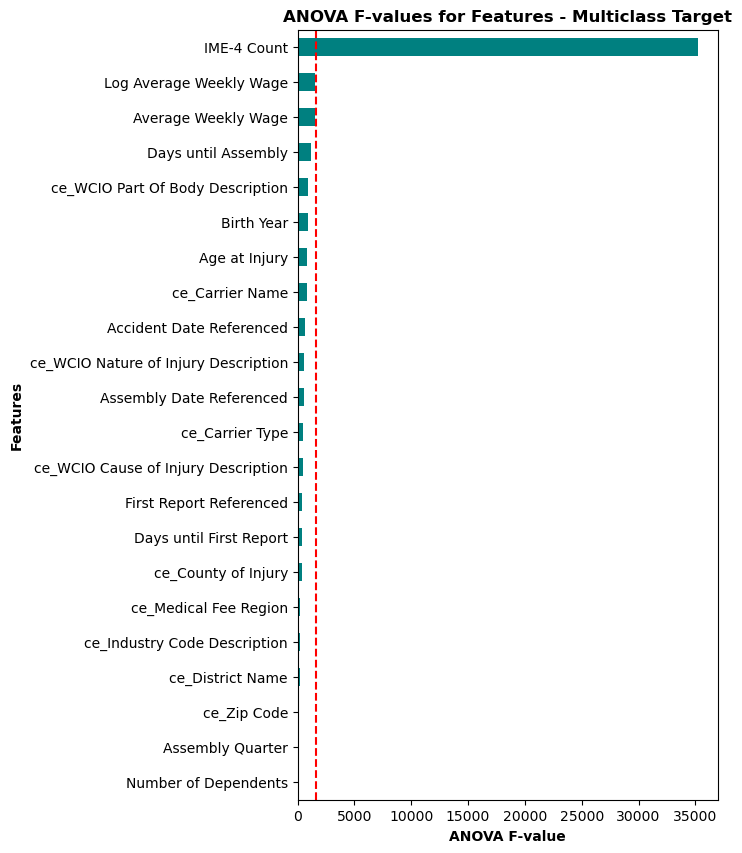

In [116]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train_multi_num, y_train_multi)

f_scores = pd.Series(fs.scores_, index=X_train_multi_num.columns)
threshold = f_scores.max()/len(f_scores)
plt.figure(figsize=(7, 10))
sns.set_palette("Set2")
f_scores.sort_values().plot(kind='barh', color='teal')

plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')

plt.xlabel('ANOVA F-value', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('ANOVA F-values for Features - Multiclass Target', fontweight='bold')
plt.subplots_adjust(left=0.3)  
plt.show()

feature_scores_multi['ANOVA'] = f_scores.to_dict()

### 2.2.3 Chi Squared

We are going to check the importance of the categorical independent variables in the target

In [ ]:
chi2_results = chi_squared_feature_selection(X_train_multi_bin, y_train_multi)
chi2_results

['Average Weekly Wage Zero',
 'Attorney/Representative',
 'C-2 Date Missing',
 'WCIO Part Of Body Description Missing',
 'IME-4 Count Missing',
 'First Hearing Date Missing',
 'C-3 Date Missing',
 'First Report Submitter',
 'COVID-19 Indicator',
 'Gender',
 'Industry Code Description Missing',
 'Alternative Dispute Resolution',
 'Carrier Type Missing']

### 2.2.4 Spearman Correlation

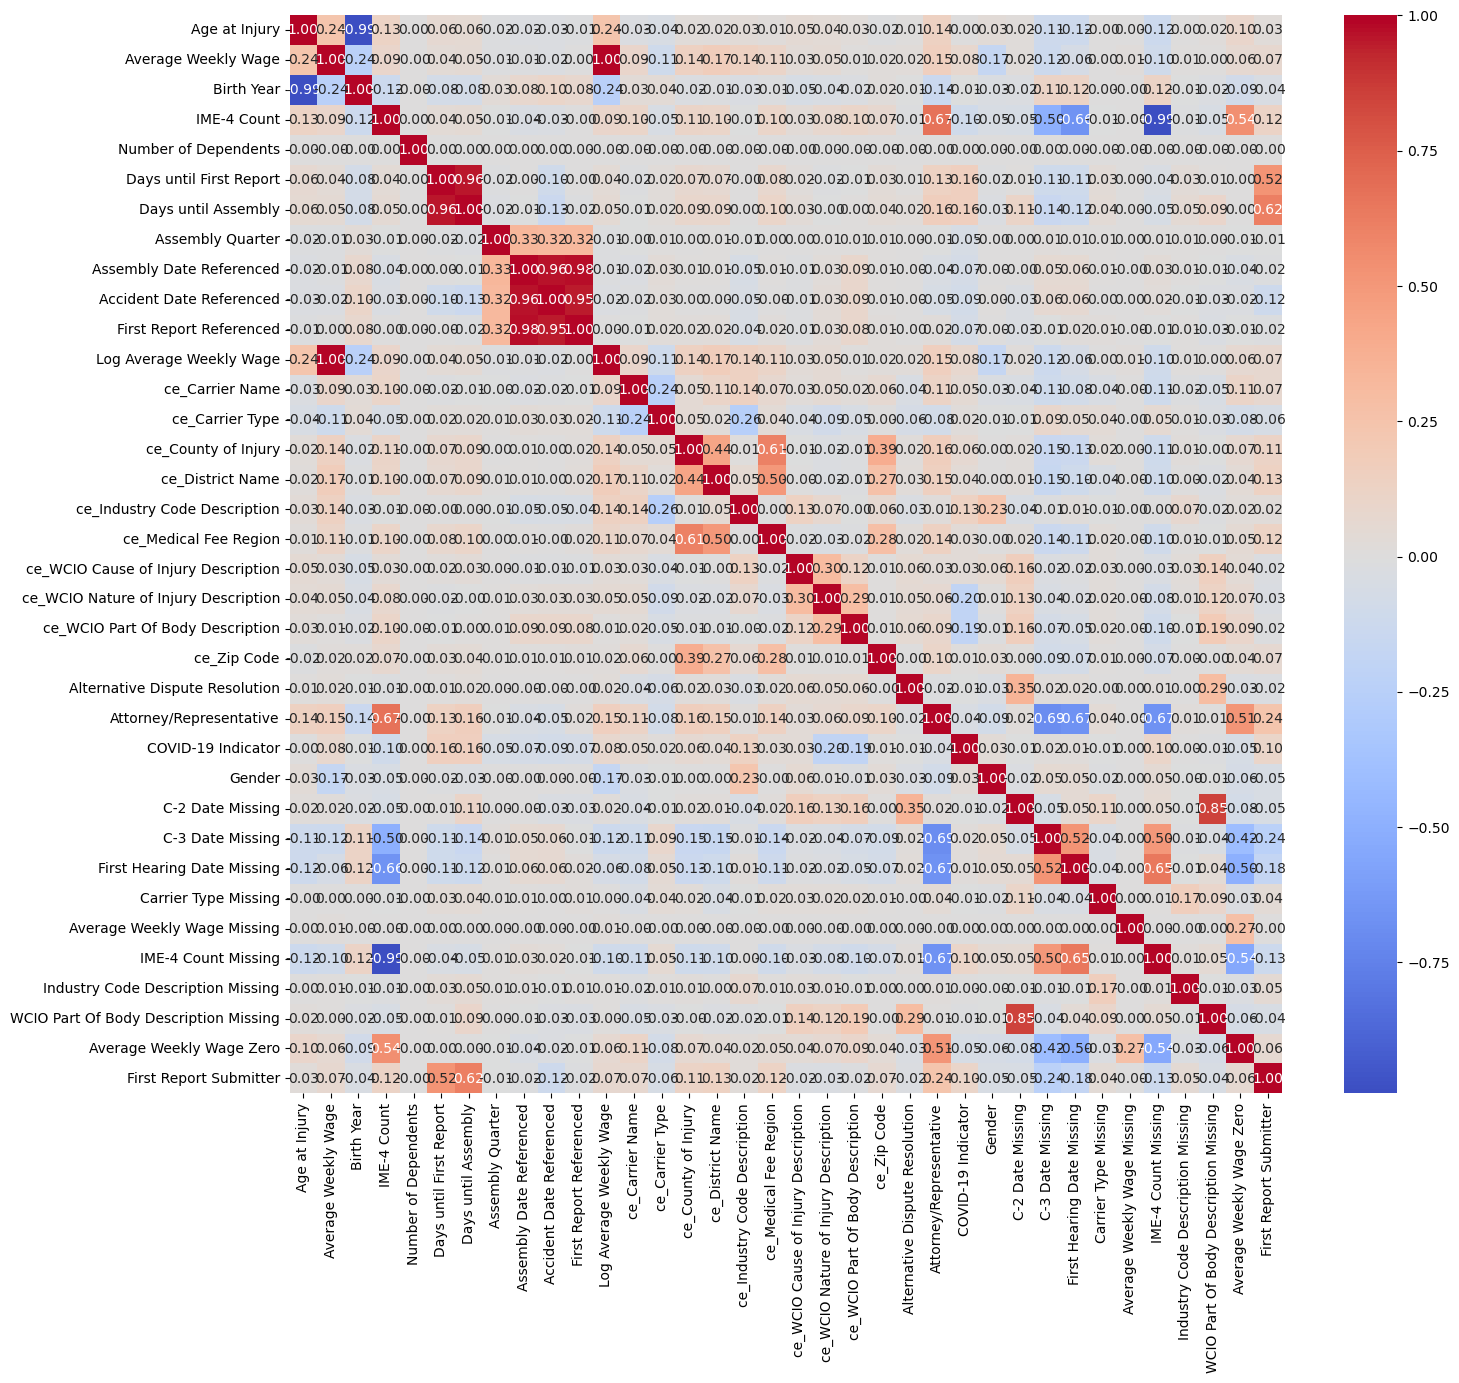

In [96]:
cor_spearman = X_train_multi_num_bin.corr(method ='spearman')
cor_spearman
cor_heatmap(cor_spearman)

- **IME-4 Count and IME-4 Count Missing**  
  A high correlation exists between these features. This is because IME-4 Count Missing acts as a flag indicating when IME-4 Count is zero, making them redundant. We will prioritize IME-4 Count as it contains both numerical and missing information and we will drop IME-4 Count.

- **Days Until Assembly and Days Until First Report**  
  These variables represent the time from the accident date to the assembly date and the submission of the first report, respectively. A high correlation between them is observed, as the assembly date typically occurs shortly after the first report is submitted. However, we will keep both to see which performs better in tree-based models.

- **Days Until Assembly/First Report and First Report Submitter**  
  A moderate correlation is observed between these variables and First Report Submitter. This suggests that the time taken from the accident date to these milestones may depend on whether the report was submitted by the employee or the employer.

- **Accident Date Referenced, Assembly Date Referenced, and First Report Referenced**  
  These features represent fixed points in time, calculated as the distance from the beginning of the assembly period to specific milestones. The distances are correlated, indicating that these events tend to occur in close proximity and may share common influencing factors. We will keep the three of them to see which performs better in tree-based models.

- **Log Average Weekly Wage and Other Variables**  
  Interesting correlations include:  
  - A negative correlation with Attorney/Representative, indicating that higher wages are less likely to involve an attorney.  
  - A negative correlation with First Hearing Date Missing, suggesting that higher wages reduce the likelihood of no hearing, possibly due to the absence of attorney involvement.  
  - A positive correlation with IME-4 Count, as higher wages may result in more medical evaluations and reports.

- **County of Injury, Zip Code Group, Zip Code, Medical Fee Region, and District Name**  
  These features exhibit high correlations, likely reflecting overlapping regional patterns and jurisdictional boundaries. This redundancy may warrant careful selection during feature analysis. We will drop Zip Code Group as it seems highly correlated with County of Injury.

- **Attorney/Representative and Other Variables**  
  The presence of an attorney seems to have a cascading influence, leading to higher wages, which in turn increases the likelihood of more medical forms (IME-4 Count).  
  - A negative correlation exists between Attorney/Representative and C-3 Date Missing, as employees without attorneys are less likely to submit reports.  
  - Similarly, a negative correlation is observed between having an attorney and First Hearing Date Missing. Employees with attorneys are more likely to have hearings scheduled.

- **C-2 Date Missing and Industry Code**  
  C-2 Date represents the date the employer submitted their report. The correlation with Industry Code suggests that certain industries are less likely to submit reports, highlighting potential reporting discrepancies.


### 2.2.5 Random Forest

                                  Feature  Importance
34               Average Weekly Wage Zero    0.231058
23                Attorney/Representative    0.055801
1                     Average Weekly Wage    0.037702
31                    IME-4 Count Missing    0.037564
11                Log Average Weekly Wage    0.037258
9                Accident Date Referenced    0.036053
3                             IME-4 Count    0.035519
28             First Hearing Date Missing    0.034230
10                First Report Referenced    0.033992
21                            ce_Zip Code    0.033458
8                Assembly Date Referenced    0.033063
30            Average Weekly Wage Missing    0.032371
6                     Days until Assembly    0.031116
20       ce_WCIO Part Of Body Description    0.030989
12                        ce_Carrier Name    0.030775
2                              Birth Year    0.028247
0                           Age at Injury    0.028188
18    ce_WCIO Cause of Injur

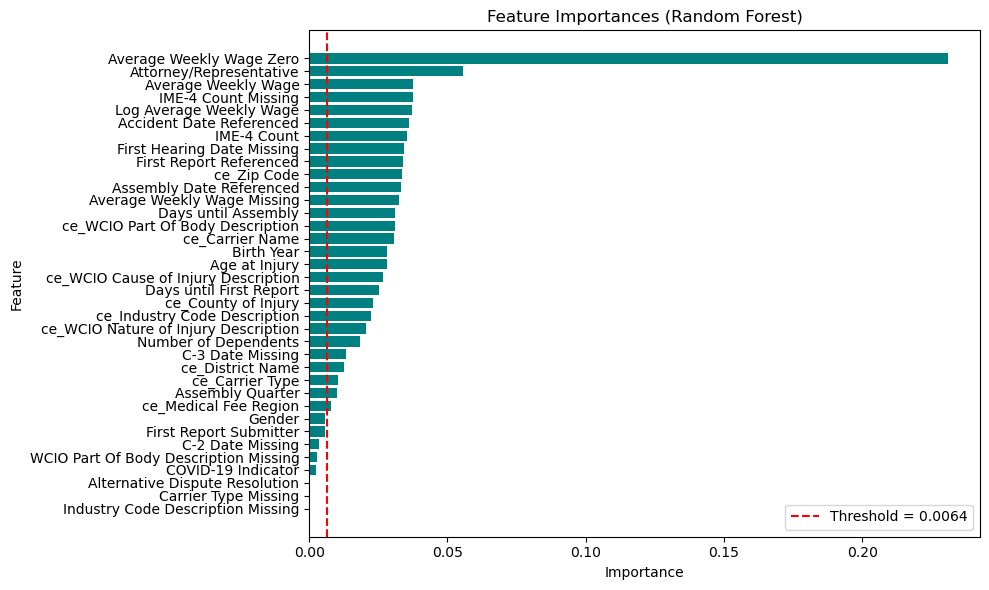

In [ ]:
# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_multi_num_bin, y_train_multi)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X_train_multi_num_bin.columns,
    'Importance': model.feature_importances_,
}).sort_values(by='Importance', ascending=False)

print(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], color='teal')

# Calculate threshold
threshold = importances['Importance'].max() / len(importances)

# Add threshold line
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.legend()

# Customize plot
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

importances_dict = importances.set_index('Feature')['Importance'].to_dict()
feature_scores_multi['Random Forest'] = importances_dict

### 2.2.6 Lasso

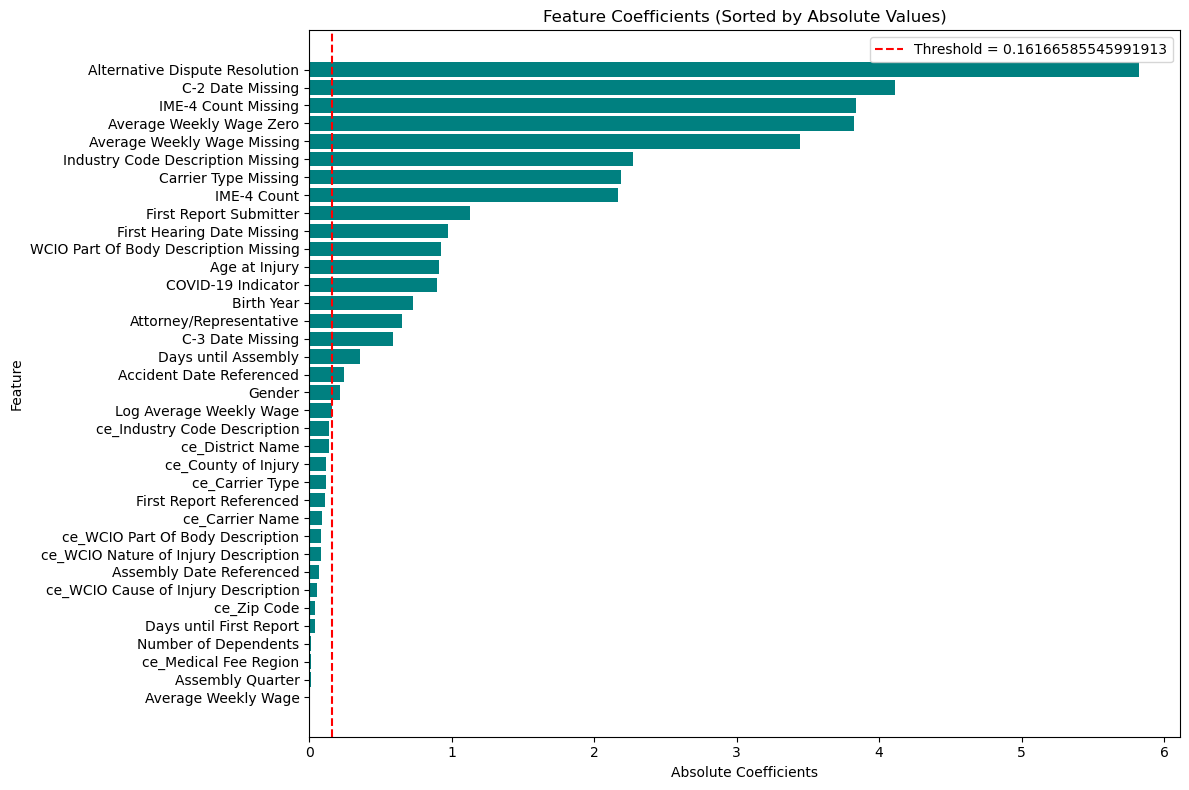

In [160]:
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_multi_num_bin, y_train_multi)

# Get feature coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_multi_num_bin.columns,
    'Coefficient': model.coef_[0]
})

# Sort coefficients by absolute value for better visualization
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['AbsCoefficient'], color='teal')

# Add threshold line
threshold = coefficients['AbsCoefficient'].max()/len(coefficients['AbsCoefficient'])
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')

# Add labels and title
plt.xlabel('Absolute Coefficients')
plt.ylabel('Feature')
plt.title('Feature Coefficients (Sorted by Absolute Values)')
plt.legend()

# Invert y-axis so the most important features are at the top
plt.gca().invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

coefficients_dict = coefficients.set_index('Feature')['Coefficient'].to_dict()
feature_scores_multi['Lasso'] = coefficients_dict

### 2.2.7 Elastic Net

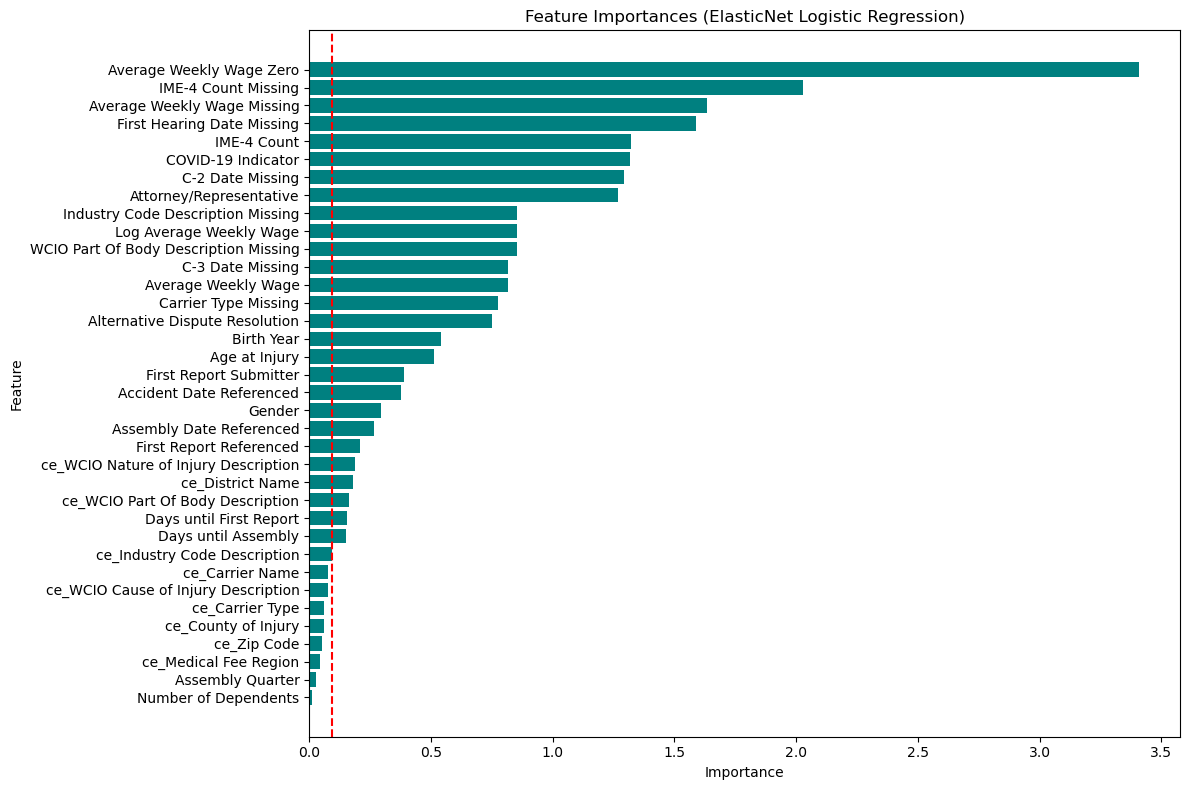

In [165]:
log_reg = LogisticRegression(
    penalty='elasticnet',
    solver='saga',      # Supports elasticnet regularization
    l1_ratio=0.5,       # ElasticNet mix (0.5 means equal L1 and L2 regularization)
    random_state=42,
    multi_class='multinomial'
)

log_reg.fit(X_train_multi_num_bin, y_train_multi)

feature_importances = np.abs(log_reg.coef_).mean(axis=0)

feature_importance_df = pd.DataFrame({
    'Feature': X_train_multi_num_bin.columns,  # Replace with your feature names
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')

# Add threshold line
threshold = feature_importance_df['Importance'].max() / len(feature_importance_df)
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (ElasticNet Logistic Regression)')

# Invert y-axis so the most important features are at the top
plt.gca().invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

importances_dict = feature_importance_df.set_index('Feature')['Importance'].to_dict()
feature_scores_multi['Elastic Net'] = importances_dict


### 2.2.8 Results

In [ ]:
df = pd.DataFrame(feature_scores_multi)
df.index.name = "Features"  

# Function to highlight selected features
def highlight_selected_features(series):
    if series.name == "Chi-Squared":  
        return ['font-weight: bold' if value < 0.05 else '' if not pd.isna(value) else '' for value in series]
    else:
        threshold = abs(series.dropna()).max() / len(series)  # Calculate threshold for other columns
        return ['font-weight: bold' if abs(value) > threshold else '' if not pd.isna(value) else '' for value in series]

# Custom formatting function to replace NaN and format values
def custom_format(x):
    if pd.isna(x) or x == "-":
        return "-"
    elif isinstance(x, (float, int)):
        if x < 0.01:
            return "< 0.01"
        else:
            return f"{x:.2f}" 
    return x

# Apply highlighting function to all columns
styled_df = df.style.apply(highlight_selected_features, axis=0)

# Apply formatting function to all columns
styled_df = styled_df.format(custom_format)

# Set table caption for clarity
styled_df.set_caption("Feature Selection Scores with Highlighted Important Features")

# Display the styled DataFrame
styled_df

,ANOVA,Chi-Squared,Random Forest,Lasso,Elastic Net
Features,,,,,
Age at Injury,849.22,-,0.03,0.91,0.51
Average Weekly Wage,1484.92,-,0.04,< 0.01,0.81
Birth Year,919.54,-,0.03,0.73,0.54
IME-4 Count,35206.24,-,0.04,< 0.01,1.32
Number of Dependents,1.17,-,0.02,< 0.01,0.01
Days until First Report,366.17,-,0.03,< 0.01,0.16
Days until Assembly,1156.89,-,0.03,0.36,0.15
Assembly Quarter,64.28,-,0.01,0.02,0.03
Assembly Date Referenced,580.27,-,0.03,0.07,0.27


In [ ]:
# Save styled DataFrame as an image
output_file = "styled_table_multi.png"
dfi.export(styled_df, output_file)

print(f"Styled DataFrame saved as image: {output_file}")

Styled DataFrame saved as image: styled_table_multi.png


<div class="alert alert-block alert-success">

# **3.** Agreement Reached Feature Selection

<div>

## **3.1** Split the data set

In [100]:
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X, y_bin, test_size = 0.3, 
                                                  random_state = 0, # Ensures reproducibility by controlling the random shuffling of data.

                                                  stratify = y_bin, # Ensures that the class distribution is preserved in both the training and validation sets, maintaining the proportion of each class.

                                                  shuffle = True)   # Shuffles the data before splitting to ensure a random distribution between the training and validation sets.
X_train_bin, X_val_bin, y_train_bin = preprocessing(X_train_bin, X_val_bin, y_train_bin, scaler)

In [101]:
binary_features = [col for col in X_train_bin.columns if X_train_bin[col].nunique() == 2]

numerical_features = [col for col in X_train_bin.columns 
                      if col not in binary_features and (col.startswith('ce_') or (col in X_train_bin.select_dtypes(include=['int32', 'int64', 'float64']).columns and not col.endswith('Code')))]

date_features = [col for col in X_train_bin.columns if col.endswith('Date')]

categorical_features = [col for col in X_train_bin.columns if col not in numerical_features + binary_features + date_features]

In [102]:
binary_features

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Gender',
 'C-2 Date Missing',
 'C-3 Date Missing',
 'First Hearing Date Missing',
 'Carrier Type Missing',
 'Average Weekly Wage Missing',
 'IME-4 Count Missing',
 'Industry Code Description Missing',
 'WCIO Part Of Body Description Missing',
 'Average Weekly Wage Zero',
 'First Report Submitter']

In [103]:
numerical_features

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Days until First Report',
 'Days until Assembly',
 'Assembly Quarter',
 'Assembly Date Referenced',
 'Accident Date Referenced',
 'First Report Referenced',
 'Log Average Weekly Wage',
 'ce_Carrier Name',
 'ce_Carrier Type',
 'ce_County of Injury',
 'ce_District Name',
 'ce_Industry Code Description',
 'ce_Medical Fee Region',
 'ce_WCIO Cause of Injury Description',
 'ce_WCIO Nature of Injury Description',
 'ce_WCIO Part Of Body Description',
 'ce_Zip Code']

## **3.2** Feature Selecion

Columns to drop heading into feature selection:

- All dates, as we don't believe they are relevant standalone. We only used them to create date diferences  
- All Codes: we're keeping the Descriptions


In [104]:
columns_to_drop = date_features + [col for col in X_train_bin.columns if col.endswith('Code') and col != 'Zip Code'  and col != 'ce_Zip Code']
X_train_bin.drop(columns=columns_to_drop, inplace=True)
numerical_features = [col for col in numerical_features if col not in columns_to_drop]

In [105]:
X_train_bin_num = X_train_bin[numerical_features]
X_train_bin_bin = X_train_bin[binary_features]
X_train_bin_num_bin = pd.concat([X_train_bin[numerical_features], X_train_bin[binary_features]], axis=1)

In [106]:
binary_features

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Gender',
 'C-2 Date Missing',
 'C-3 Date Missing',
 'First Hearing Date Missing',
 'Carrier Type Missing',
 'Average Weekly Wage Missing',
 'IME-4 Count Missing',
 'Industry Code Description Missing',
 'WCIO Part Of Body Description Missing',
 'Average Weekly Wage Zero',
 'First Report Submitter']

In [107]:
numerical_features

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'IME-4 Count',
 'Number of Dependents',
 'Days until First Report',
 'Days until Assembly',
 'Assembly Quarter',
 'Assembly Date Referenced',
 'Accident Date Referenced',
 'First Report Referenced',
 'Log Average Weekly Wage',
 'ce_Carrier Name',
 'ce_Carrier Type',
 'ce_County of Injury',
 'ce_District Name',
 'ce_Industry Code Description',
 'ce_Medical Fee Region',
 'ce_WCIO Cause of Injury Description',
 'ce_WCIO Nature of Injury Description',
 'ce_WCIO Part Of Body Description',
 'ce_Zip Code']

In [121]:
feature_scores_bin = {}

### 3.2.1 Univariate Analysis

Checking if some variable is univariate (variance equal to 0). If so, drop the variable.

In [108]:
X_train_bin_num.var()

Age at Injury                           1.000003
Average Weekly Wage                     1.000003
Birth Year                              1.000003
IME-4 Count                             1.000003
Number of Dependents                    1.000003
Days until First Report                 1.000003
Days until Assembly                     1.000003
Assembly Quarter                        1.258873
Assembly Date Referenced                1.000003
Accident Date Referenced                1.000003
First Report Referenced                 1.000003
Log Average Weekly Wage                 1.000003
ce_Carrier Name                         1.000003
ce_Carrier Type                         1.000003
ce_County of Injury                     1.000003
ce_District Name                        1.000003
ce_Industry Code Description            1.000003
ce_Medical Fee Region                   1.000003
ce_WCIO Cause of Injury Description     1.000003
ce_WCIO Nature of Injury Description    1.000003
ce_WCIO Part Of Body

### 3.2.2 ANOVA

Just for numerical features

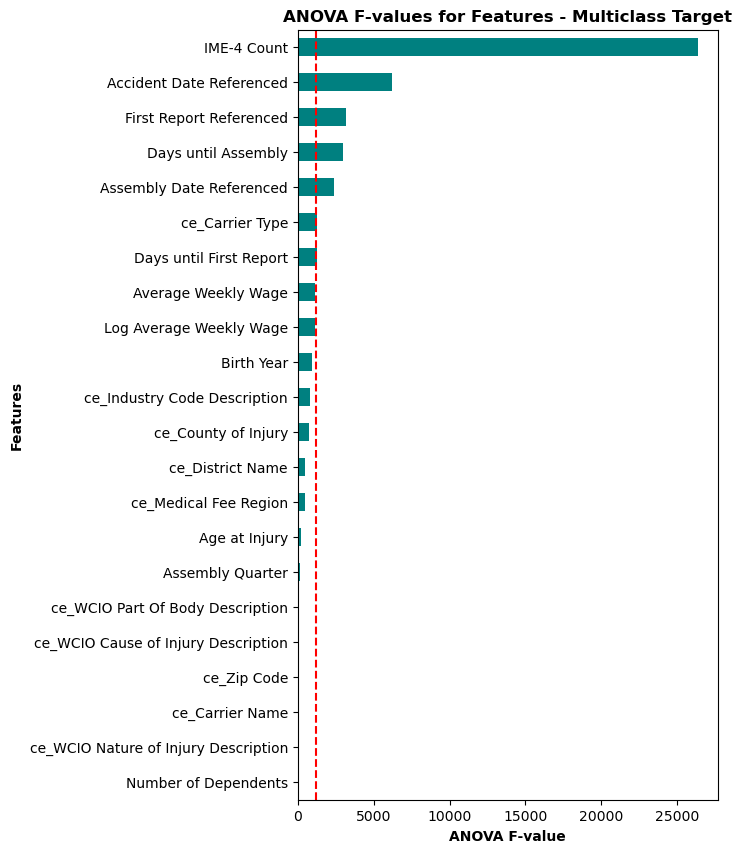

In [122]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train_bin_num, y_train_bin)

f_scores = pd.Series(fs.scores_, index=X_train_bin_num.columns)
threshold = f_scores.max()/len(f_scores)
plt.figure(figsize=(7, 10))
sns.set_palette("Set2")
f_scores.sort_values().plot(kind='barh', color='teal')

plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')

plt.xlabel('ANOVA F-value', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('ANOVA F-values for Features - Multiclass Target', fontweight='bold')
plt.subplots_adjust(left=0.3)  
plt.show()

coefficients_dict = coefficients.set_index('Feature')['Coefficient'].to_dict()
feature_scores_multi['Lasso'] = coefficients_dict

feature_scores_bin['ANOVA'] = f_scores.to_dict()

### 3.2.3 Chi Squared

We are going to check the importance of the categorical independent variables in the target

In [110]:
chi2_results = chi_squared_feature_selection(X_train_bin_bin, y_train_bin)
chi2_results

['Attorney/Representative',
 'First Hearing Date Missing',
 'IME-4 Count Missing',
 'C-3 Date Missing',
 'Average Weekly Wage Zero',
 'First Report Submitter',
 'COVID-19 Indicator',
 'Gender',
 'C-2 Date Missing',
 'WCIO Part Of Body Description Missing',
 'Alternative Dispute Resolution']

### 3.2.4 Spearman Correlation

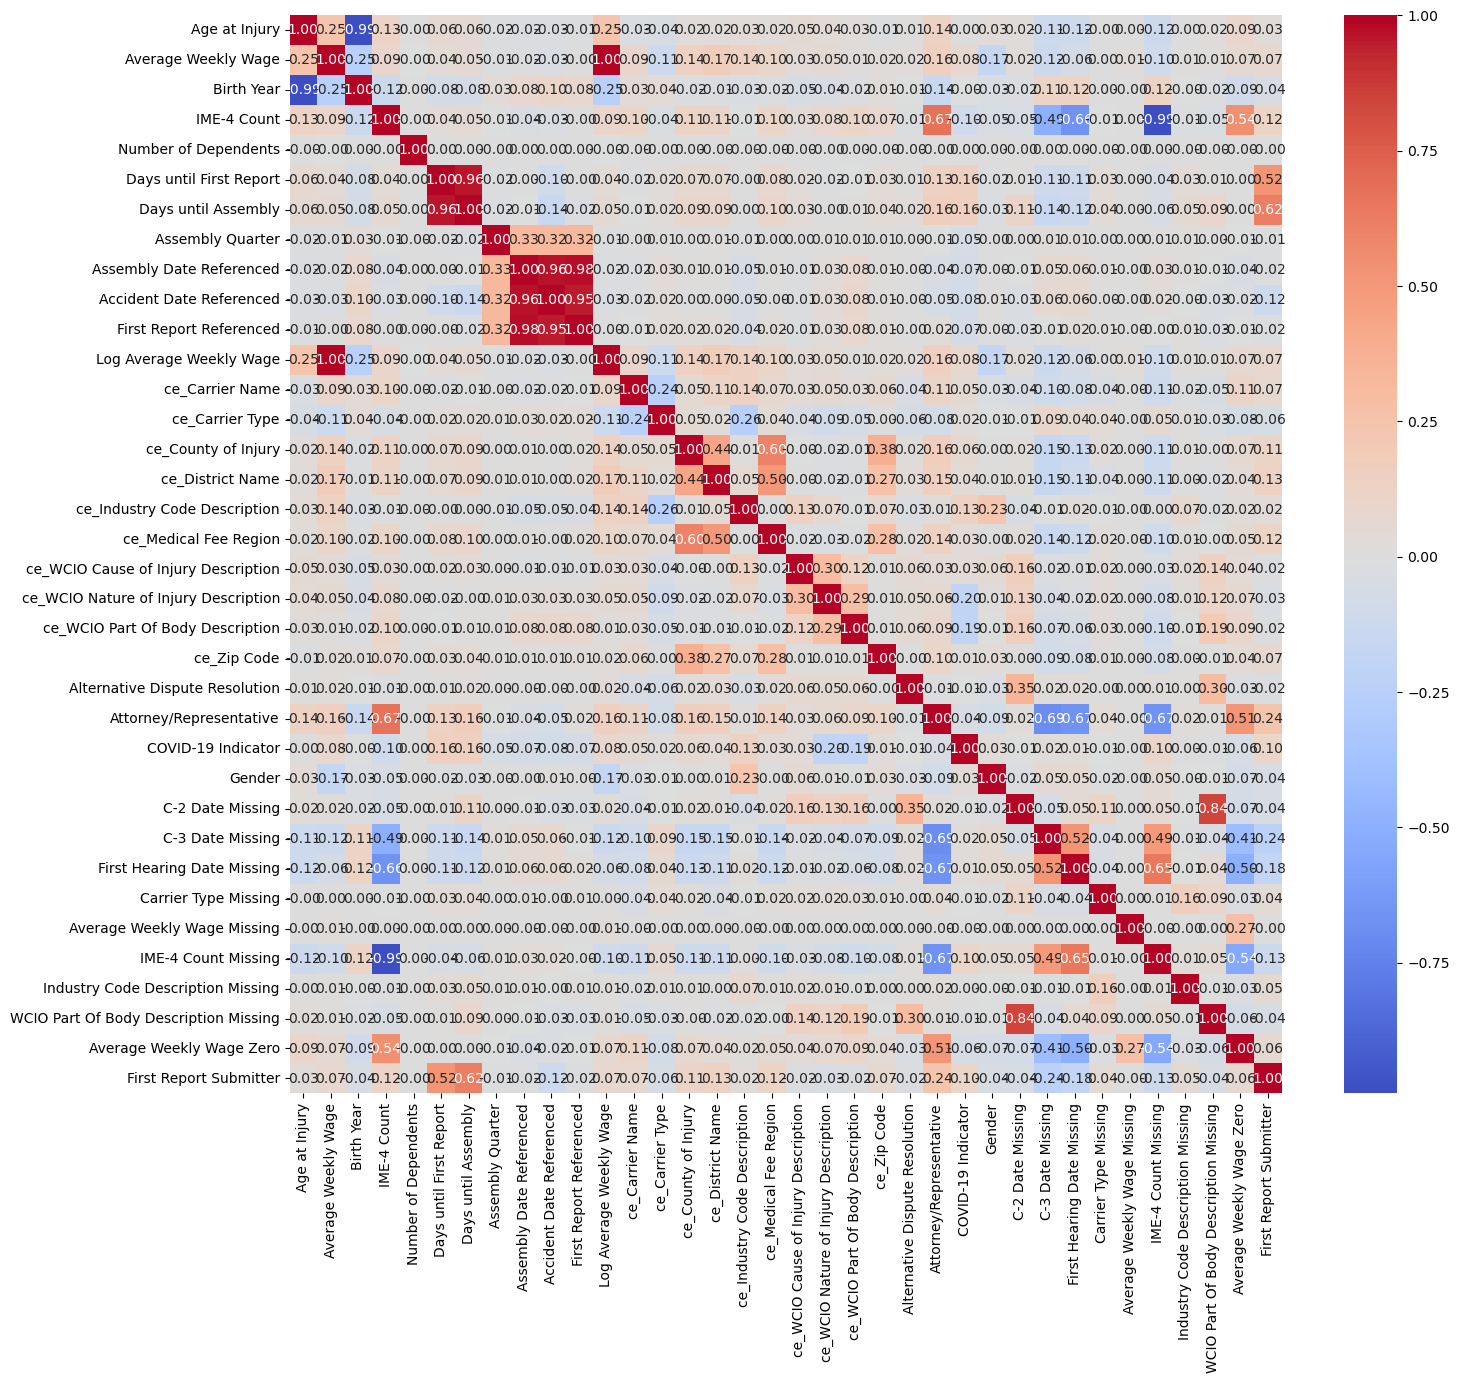

In [111]:
cor_spearman = X_train_bin_num_bin.corr(method ='spearman')
cor_spearman
cor_heatmap(cor_spearman)

- **IME-4 Count and IME-4 Count Missing**  
  A high correlation exists between these features. This is because IME-4 Count Missing acts as a flag indicating when IME-4 Count is zero, making them redundant. We will prioritize IME-4 Count as it contains both numerical and missing information and we will drop IME-4 Count.

- **Days Until Assembly and Days Until First Report**  
  These variables represent the time from the accident date to the assembly date and the submission of the first report, respectively. A high correlation between them is observed, as the assembly date typically occurs shortly after the first report is submitted. However, we will keep both to see which performs better in tree-based models.

- **Days Until Assembly/First Report and First Report Submitter**  
  A moderate correlation is observed between these variables and First Report Submitter. This suggests that the time taken from the accident date to these milestones may depend on whether the report was submitted by the employee or the employer.

- **Accident Date Referenced, Assembly Date Referenced, and First Report Referenced**  
  These features represent fixed points in time, calculated as the distance from the beginning of the assembly period to specific milestones. The distances are correlated, indicating that these events tend to occur in close proximity and may share common influencing factors. We will keep the three of them to see which performs better in tree-based models.

- **Log Average Weekly Wage and Other Variables**  
  Interesting correlations include:  
  - A negative correlation with Attorney/Representative, indicating that higher wages are less likely to involve an attorney.  
  - A negative correlation with First Hearing Date Missing, suggesting that higher wages reduce the likelihood of no hearing, possibly due to the absence of attorney involvement.  
  - A positive correlation with IME-4 Count, as higher wages may result in more medical evaluations and reports.

- **County of Injury, Zip Code Group, Zip Code, Medical Fee Region, and District Name**  
  These features exhibit high correlations, likely reflecting overlapping regional patterns and jurisdictional boundaries. This redundancy may warrant careful selection during feature analysis. We will drop Zip Code Group as it seems highly correlated with County of Injury.

- **Attorney/Representative and Other Variables**  
  The presence of an attorney seems to have a cascading influence, leading to higher wages, which in turn increases the likelihood of more medical forms (IME-4 Count).  
  - A negative correlation exists between Attorney/Representative and C-3 Date Missing, as employees without attorneys are less likely to submit reports.  
  - Similarly, a negative correlation is observed between having an attorney and First Hearing Date Missing. Employees with attorneys are more likely to have hearings scheduled.

- **C-2 Date Missing and Industry Code**  
  C-2 Date represents the date the employer submitted their report. The correlation with Industry Code suggests that certain industries are less likely to submit reports, highlighting potential reporting discrepancies.


### 3.2.5 Random Forest

                                  Feature  Importance
9                Accident Date Referenced    0.071617
6                     Days until Assembly    0.057989
11                Log Average Weekly Wage    0.057705
1                     Average Weekly Wage    0.057611
10                First Report Referenced    0.056875
21                            ce_Zip Code    0.053401
8                Assembly Date Referenced    0.052656
12                        ce_Carrier Name    0.042684
2                              Birth Year    0.041438
0                           Age at Injury    0.041116
23                Attorney/Representative    0.041062
5                 Days until First Report    0.039037
3                             IME-4 Count    0.038781
18    ce_WCIO Cause of Injury Description    0.037783
20       ce_WCIO Part Of Body Description    0.036885
14                    ce_County of Injury    0.033986
16           ce_Industry Code Description    0.033690
19   ce_WCIO Nature of Injur

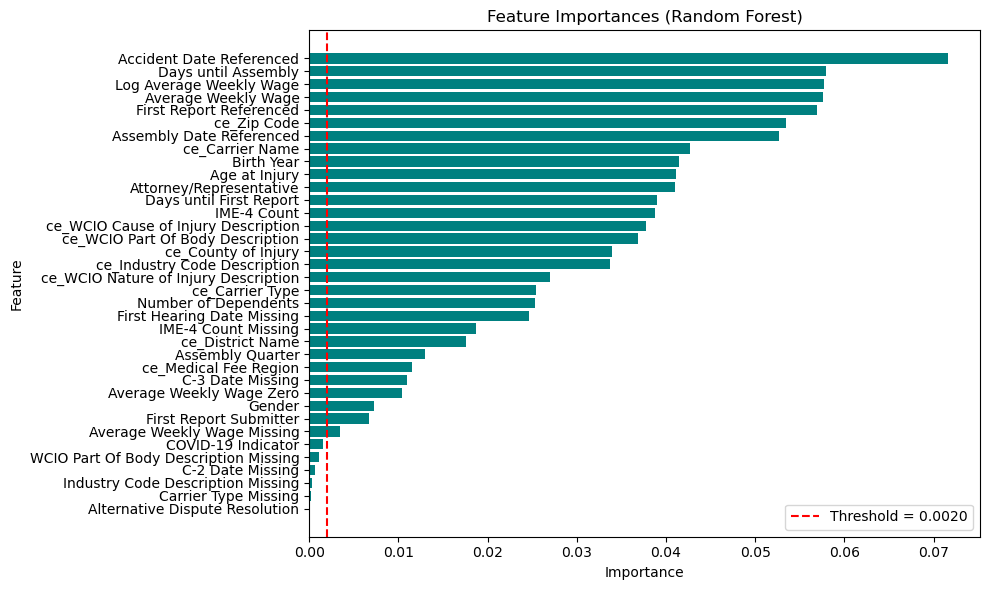

In [ ]:
# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bin_num_bin, y_train_bin)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X_train_bin_num_bin.columns,
    'Importance': model.feature_importances_,
}).sort_values(by='Importance', ascending=False)

print(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], color='teal')

# Calculate threshold
threshold = importances['Importance'].max() / len(importances)

# Add threshold line
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.legend()

# Customize plot
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

importances_dict = importances.set_index('Feature')['Importance'].to_dict()
feature_scores_bin['Random Forest'] = importances_dict

### 3.2.6 Lasso

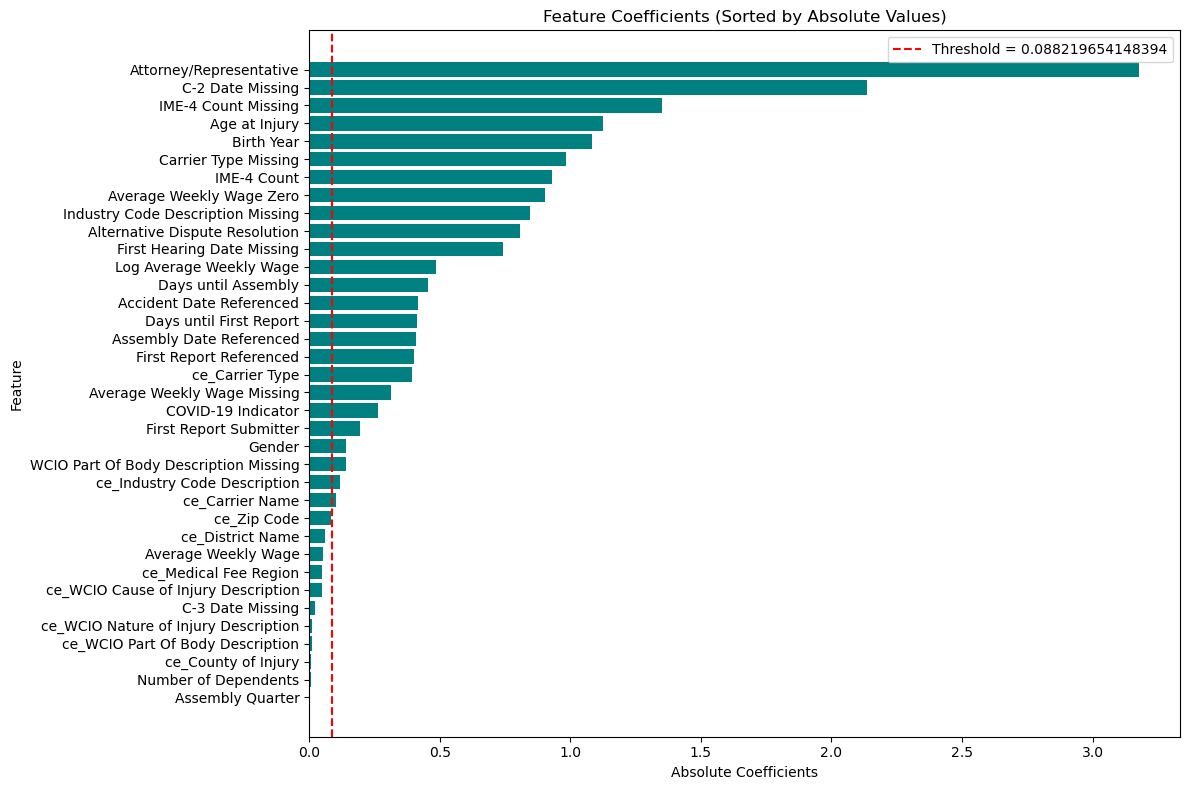

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_bin_num_bin, y_train_bin)

# Get feature coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_bin_num_bin.columns,
    'Coefficient': model.coef_[0]
})

# Sort coefficients by absolute value for better visualization
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['AbsCoefficient'], color='teal')

# Add threshold line
threshold = coefficients['AbsCoefficient'].max()/len(coefficients['AbsCoefficient'])
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')

# Add labels and title
plt.xlabel('Absolute Coefficients')
plt.ylabel('Feature')
plt.title('Feature Coefficients (Sorted by Absolute Values)')
plt.legend()

# Invert y-axis so the most important features are at the top
plt.gca().invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

coefficients_dict = coefficients.set_index('Feature')['Coefficient'].to_dict()
feature_scores_bin['Lasso'] = coefficients_dict

In [127]:
coefficients_dict = coefficients.set_index('Feature')['Coefficient'].to_dict()
feature_scores_bin['Lasso'] = coefficients_dict


### 3.2.7 Elastic Net

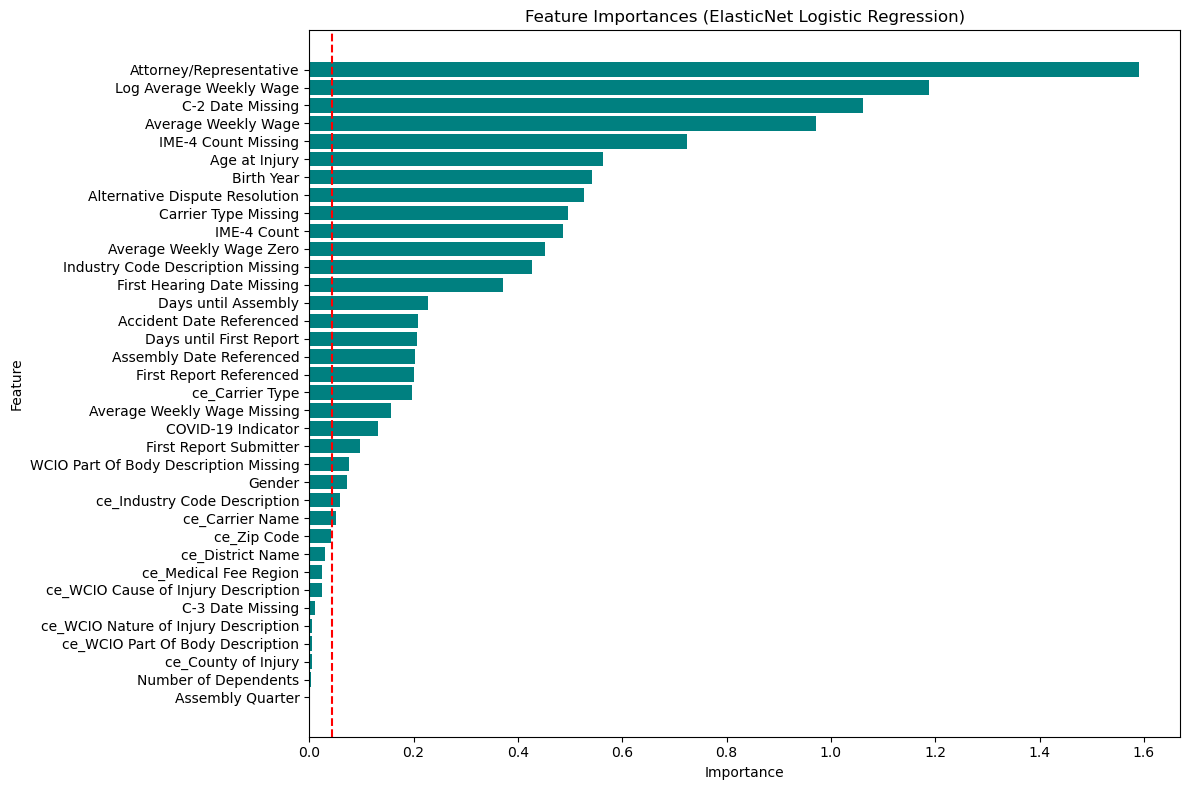

In [ ]:
log_reg = LogisticRegression(
    penalty='elasticnet',
    solver='saga',      
    l1_ratio=0.5,      
    random_state=42,
    multi_class='multinomial'
)

log_reg.fit(X_train_bin_num_bin, y_train_bin)

feature_importances = np.abs(log_reg.coef_).mean(axis=0)

feature_importance_df = pd.DataFrame({
    'Feature': X_train_bin_num_bin.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')

# Add threshold line
threshold = feature_importance_df['Importance'].max() / len(feature_importance_df)
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (ElasticNet Logistic Regression)')

# Invert y-axis so the most important features are at the top
plt.gca().invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

importances_dict = feature_importance_df.set_index('Feature')['Importance'].to_dict()
feature_scores_bin['Elastic Net'] = importances_dict

In [128]:
importances_dict = feature_importance_df.set_index('Feature')['Importance'].to_dict()
feature_scores_bin['Elastic Net'] = importances_dict

### 3.2.8 Results

In [ ]:
df = pd.DataFrame(feature_scores_bin)
df.index.name = "Features" 

# Function to highlight selected features
def highlight_selected_features(series):
    if series.name == "Chi-Squared": 
        return ['font-weight: bold' if value < 0.05 else '' if not pd.isna(value) else '' for value in series]
    else:
        threshold = abs(series.dropna()).max() / len(series)  f
        return ['font-weight: bold' if abs(value) > threshold else '' if not pd.isna(value) else '' for value in series]

# Custom formatting function to replace NaN and format values
def custom_format(x):
    if pd.isna(x) or x == "-": 
        return "-"
    elif isinstance(x, (float, int)):
        if x < 0.01:  
            return "< 0.01"
        else:
            return f"{x:.2f}"
    return x

# Apply highlighting function to all columns
styled_df = df.style.apply(highlight_selected_features, axis=0)

# Apply formatting function to all columns
styled_df = styled_df.format(custom_format)

# Set table caption for clarity
styled_df.set_caption("Feature Selection Scores with Highlighted Important Features")

# Display the styled DataFrame
styled_df

,ANOVA,Chi-Squared,Random Forest,Lasso,Elastic Net
Features,,,,,
Age at Injury,243.69,-,0.04,< 0.01,0.56
Average Weekly Wage,1140.59,-,0.06,0.05,0.97
Birth Year,926.57,-,0.04,< 0.01,0.54
IME-4 Count,26340.42,-,0.04,0.93,0.49
Number of Dependents,1.04,-,0.03,< 0.01,< 0.01
Days until First Report,1251.34,-,0.04,< 0.01,0.21
Days until Assembly,2968.47,-,0.06,0.46,0.23
Assembly Quarter,181.98,-,0.01,< 0.01,< 0.01
Assembly Date Referenced,2416.86,-,0.05,0.41,0.20


In [ ]:
# Save styled DataFrame as an image
output_file = "styled_table.png"
dfi.export(styled_df, output_file)

print(f"Styled DataFrame saved as image: {output_file}")

Styled DataFrame saved as image: styled_table.png
